In [1]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# construction du modèle

In [2]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                          input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer ='rmsprop', loss ='mse' , metrics = ['mean_absolute_error'])
    return model


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('ex1data1.txt', header=None,sep =',', names= ['x','y'])
train_targets = data['y'][:70].to_numpy()
train_targets = np.reshape(train_targets,(-1,1))
train_data = data['x'][:70].to_numpy()
train_data = np.reshape(train_data, (-1, 1))
test_data = data['x'][70:].to_numpy()
test_data = np.reshape(test_data, (-1, 1))
test_targets = data['y'][70:].to_numpy()
test_targets = np.reshape(test_targets, (-1, 1))
moyenne = train_data.mean(axis= 0)
train_data -= moyenne
stand = train_data.std(axis = 0)
train_data /= stand

In [4]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 5
all_mae_histories =[]
for i in range(k):
    val_data    = train_data[i * num_val_samples: (i + 1 ) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i* num_val_samples], 
        train_data[(i + 1)* num_val_samples :  ]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i* num_val_samples], 
        train_targets[(i + 1)* num_val_samples :  ]],
        axis = 0)
    

In [5]:
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data = ( val_data, val_targets),
                               epochs= num_epochs, batch_size = 1 , verbose = 0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)


# Visualisation de la courbe d'apprentissage

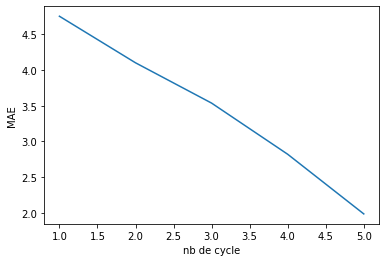

In [6]:
average_mae_histo = [np.mean(
    [x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_histo ) + 1), average_mae_histo )
plt.xlabel('nb de cycle')
plt.ylabel('MAE')
plt.show()

# visualisation de la courbe des estimations

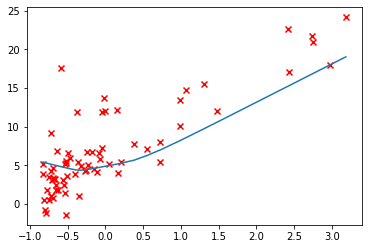

In [10]:
estimation = [] 
X = sorted(train_data)
for un_x in  X:
    estimation.append(model.predict([un_x]).flatten().tolist()[0])
    
plt.scatter(train_data, train_targets, c='red', marker ='x')
plt.plot(X, estimation)    

In [11]:
est1 = (3.5000 - moyenne) / stand
est2 = (7.0000 - moyenne) / stand

print(est1, est2)
ret1 = (model.predict([est1])*10000)
ret2 = (model.predict([est2])*10000)
print('estimation 35000: ',ret1)
print('estimation 70000: ',ret2)

[-1.19300845] [-0.37378287]
estimation 35000:  [[64725.188]]
estimation 70000:  [[43773.35]]
